In [ ]:
!pip install gensim scikit-learn matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns


In [ ]:
documents = [
    "I love watching movies",
    "This movie is amazing",
    "I hate boring films",
    "The film was fantastic",
    "This movie is not good"
]

In [ ]:
# Preprocessing
tokenized_docs = [doc.lower().split() for doc in documents]

# Train CBOW model
cbow_model = Word2Vec(sentences=tokenized_docs, vector_size=50, window=5, min_count=1, sg=0)

# Train Skip-gram model
skipgram_model = Word2Vec(sentences=tokenized_docs, vector_size=50, window=5, min_count=1, sg=1)

In [ ]:
def visualize_embeddings(model):
    words = list(model.wv.index_to_key)
    X = model.wv[words]
    tsne = TSNE(n_components=2, perplexity=2, random_state=42)
    X_2d = tsne.fit_transform(X)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, (X_2d[i, 0], X_2d[i, 1]))
    plt.show()

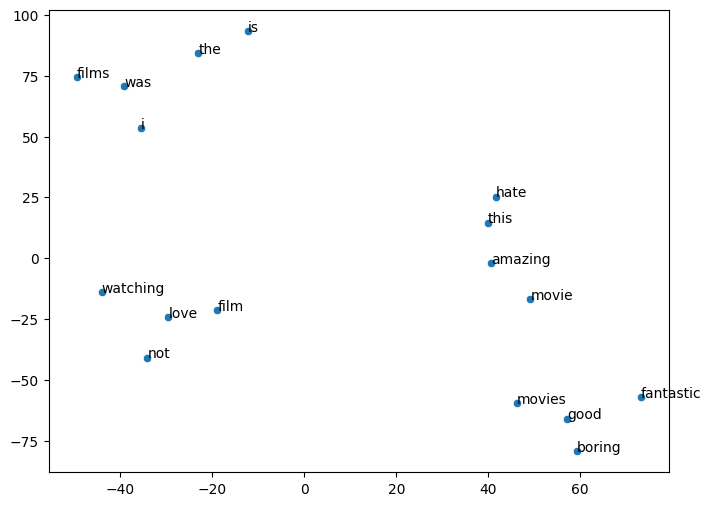

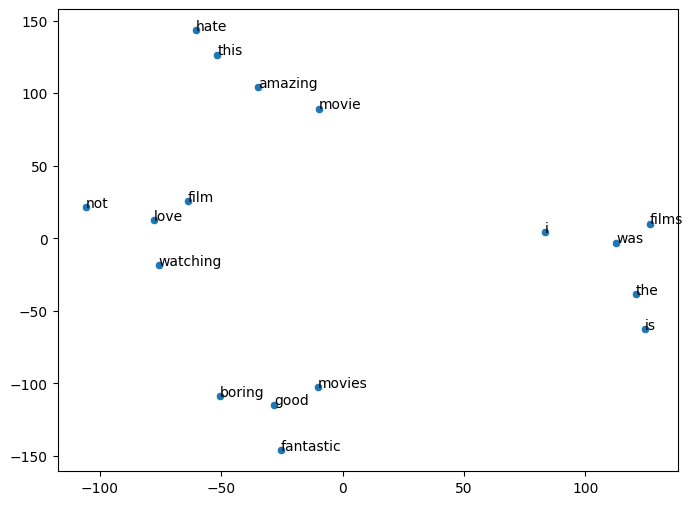

In [ ]:
visualize_embeddings(cbow_model)
visualize_embeddings(skipgram_model)

In [ ]:
custom_model = Word2Vec(
    sentences=tokenized_docs,
    vector_size=100,
    window=3,
    min_count=1,
    epochs=10,
    sg=1
)


In [ ]:
similar_words = custom_model.wv.most_similar('movie')
print("Words similar to 'movie':", similar_words)

Words similar to 'movie': [('good', 0.19911180436611176), ('films', 0.1727246195077896), ('amazing', 0.17018885910511017), ('watching', 0.145950585603714), ('love', 0.06408977508544922), ('the', 0.046526189893484116), ('movies', -0.002754019573330879), ('is', -0.013530608266592026), ('hate', -0.016904227435588837), ('fantastic', -0.01963859423995018)]


In [ ]:
print(custom_model.wv.most_similar('film'))

[('amazing', 0.25290459394454956), ('this', 0.13725271821022034), ('love', 0.04410674050450325), ('was', 0.02700837142765522), ('watching', 0.01281161978840828), ('is', 0.006608100607991219), ('boring', -0.0011978191323578358), ('movies', -0.025461023673415184), ('hate', -0.03247775509953499), ('i', -0.04127022251486778)]


In [ ]:
analogy_result = custom_model.wv.most_similar(positive=['movie', 'fantastic'], negative=['boring'])
print("Analogy result:", analogy_result)

Analogy result: [('amazing', 0.24693551659584045), ('this', 0.12960635125637054), ('good', 0.08752007782459259), ('films', 0.04245245084166527), ('hate', 0.03358886018395424), ('love', 0.009882221929728985), ('movies', -0.0172285046428442), ('not', -0.020629456266760826), ('watching', -0.028267256915569305), ('i', -0.03376516327261925)]
